In [66]:
import pandas as pd
import numpy as np

In [67]:
data = pd.read_csv('iris_short.csv')
data_np = data.values

In [68]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


In [69]:
np.random.shuffle(data_np)

In [70]:
X = data_np[:,2:-1]

In [71]:
X

array([[4.7, 1.4],
       [4.0, 1.3],
       [5.0, 1.7],
       [4.5, 1.5],
       [4.4, 1.4],
       [6.3, 1.8],
       [5.9, 2.1],
       [5.8, 1.8],
       [4.2, 1.3],
       [5.1, 1.5],
       [3.7, 1.0],
       [5.4, 2.3],
       [4.1, 1.0],
       [6.7, 2.0],
       [5.0, 2.0],
       [6.0, 1.8],
       [6.9, 2.3],
       [5.6, 2.4],
       [5.8, 1.6],
       [4.5, 1.5],
       [3.3, 1.0],
       [4.0, 1.0],
       [5.1, 1.8],
       [6.7, 2.2],
       [5.7, 2.3],
       [4.5, 1.3],
       [3.9, 1.2],
       [4.2, 1.5],
       [6.1, 2.3],
       [4.5, 1.5],
       [4.7, 1.6],
       [5.3, 2.3],
       [6.1, 2.5],
       [3.5, 1.0],
       [5.5, 1.8],
       [3.6, 1.3],
       [4.5, 1.6],
       [5.7, 2.1],
       [4.9, 1.5],
       [6.4, 2.0],
       [4.1, 1.3],
       [4.8, 1.4],
       [5.1, 1.9],
       [5.0, 1.9],
       [5.9, 2.3],
       [5.7, 2.5],
       [4.6, 1.3],
       [4.6, 1.4],
       [5.3, 1.9],
       [5.5, 2.1],
       [3.3, 1.0],
       [5.5, 1.8],
       [4.9,

In [72]:
y = data_np[:,-1]

In [73]:
y

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor

In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # categorical 변수의 값을 숫자로 변환하는데 사용
input_classes =['versicolor','virginica']
le.fit(input_classes)
y = le.transform(y)

In [75]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [77]:
# 분류문제용 decisionTree
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2)

In [78]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [79]:
tree_clf.score(X_test, y_test)

0.9

1. classfication report
2. roc curve 아래의 AUC를 계산하여 

추가적인 검증을 해주면 더욱 좋음

## 시각화

1) using plot_tree from sklearn

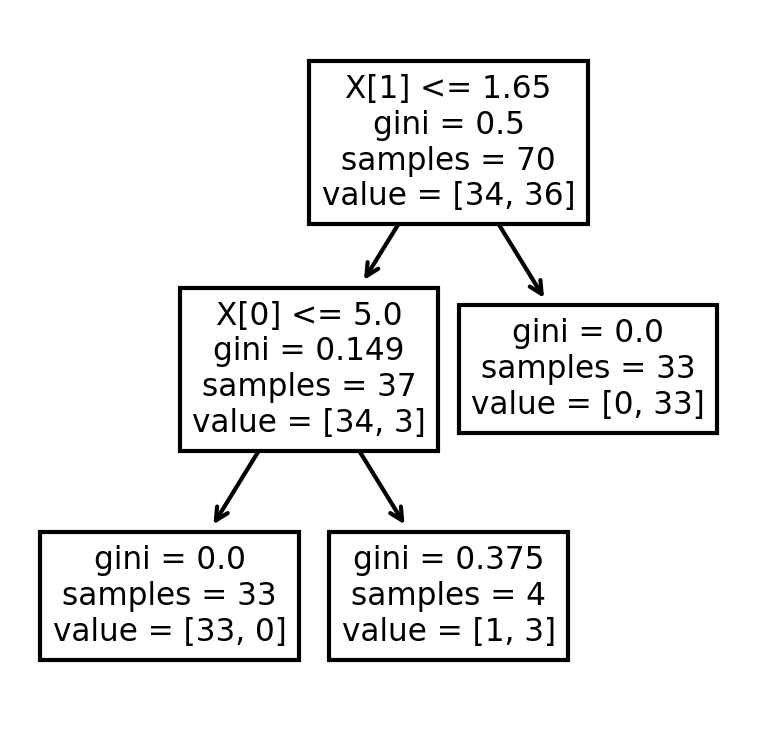

In [80]:
#만들어진 트리의 모양을 직접 확인해보기
# x[0] : petal length
# x[1] : petal width
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(tree_clf)
plt.show()
fig.savefig('tree.png')

## 새로운 값 예측

In [81]:
tree_clf.predict_proba([[5, 1.5]])

array([[1., 0.]])

In [82]:
tree_clf.predict([[5, 1.5]])

array([0])

#### 하이퍼 파라미터를 일일히 바꿔가며 탐색하기에는 힘들기 때문에 Grid search를 활용함

## Grid Search 사용하기

In [90]:
tree_clf1=DecisionTreeClassifier(criterion = 'gini')

In [91]:
from sklearn.model_selection import GridSearchCV
tree_params = {
    'max_depth' : [2,3,4,5],
     'min_samples_split':[2,5,10,15]
}

In [92]:
grid_search = GridSearchCV(tree_clf1, param_grid=tree_params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 15]})

In [93]:
grid_search.best_params_
# Best hyperparameter의 값들을 return 합니다.

{'max_depth': 2, 'min_samples_split': 2}

In [94]:
best_model = grid_search.best_estimator_
# Best estimator (모형)을 return합니다. 
y_preds = best_model.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9

In [96]:
best_model.score(X_test, y_test)

0.9